In [ ]:
import os
for root, dirs, files in os.walk('/imot/input'):
    for file in files:
        print(os.path.join(root, file))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    f1_score,
    confusion_matrix
)
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/iot/mitbih_train.csv',header=None)
test_df=pd.read_csv('/content/drive/MyDrive/iot/mitbih_test.csv',header=None)

In [ ]:
train_df[187] = train_df[187].astype(int)
class_distribution = train_df[187].value_counts()
print(class_distribution)
print(train_df.describe())
print(train_df.head())


187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64
                0             1             2             3             4    \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.890360      0.758160      0.423972      0.219104      0.201127   
std        0.240909      0.221813      0.227305      0.206878      0.177058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.921922      0.682486      0.250969      0.048458      0.082329   
50%        0.991342      0.826013      0.429472      0.166000      0.147878   
75%        1.000000      0.910506      0.578767      0.341727      0.258993   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.210399      0.205808      0.2017

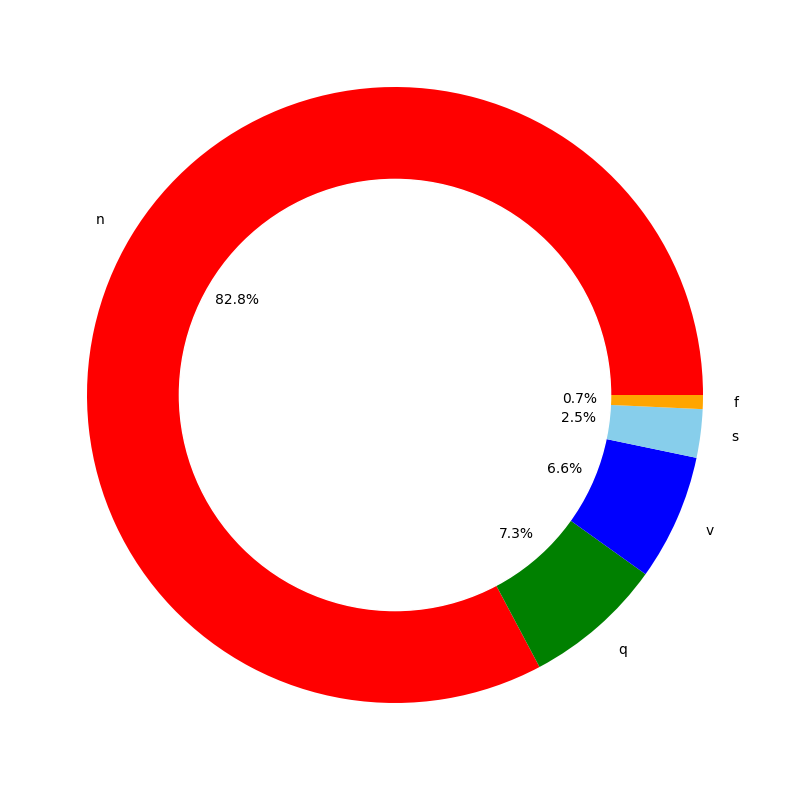

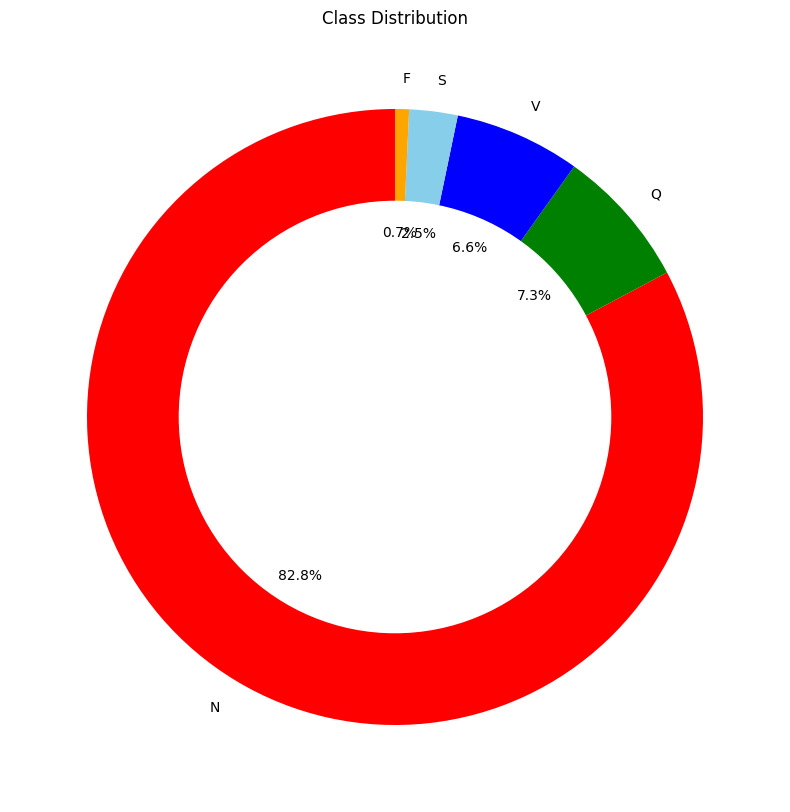

In [ ]:
plt.figure(figsize=(20, 10))
center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(
    class_distribution,
    labels=['n', 'q', 'v', 's', 'f'],
    colors=['red', 'green', 'blue', 'skyblue', 'orange'],
    autopct='%1.1f%%'
)
plt.gca().add_artist(center_circle)
plt.show()
class_distribution = train_df[187].value_counts()
labels = ['N', 'Q', 'V', 'S', 'F'] # Assuming 0: 'N', 1: 'Q', 2: 'V', 3: 'S', 4: 'F'
colors = ['red', 'green', 'blue', 'skyblue', 'orange']
# Create pie chart
plt.figure(figsize=(10, 10)) # Adjust figure size as needed
plt.pie(class_distribution.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white')) # Add white circle for donut effect
plt.show()


In [ ]:
from sklearn.utils import resample
df_0 = train_df[train_df[187] == 0].sample(n=20000, random_state=42)
df_1 = train_df[train_df[187] == 1]
df_2 = train_df[train_df[187] == 2]
df_3 = train_df[train_df[187] == 3]
df_4 = train_df[train_df[187] == 4]
df_1_upsampled = resample(df_1, replace=True, n_samples=20000, random_state=123)
df_2_upsampled = resample(df_2, replace=True, n_samples=20000, random_state=124)
df_3_upsampled = resample(df_3, replace=True, n_samples=20000, random_state=125)
df_4_upsampled = resample(df_4, replace=True, n_samples=20000, random_state=126)
train_df = pd.concat([df_0, df_1_upsampled, df_2_upsampled, df_3_upsampled, df_4_upsampled])
# Separate data by class
df_0 = train_df[train_df[187] == 0]
df_1 = train_df[train_df[187] == 1]
df_2 = train_df[train_df[187] == 2]
df_3 = train_df[train_df[187] == 3]
df_4 = train_df[train_df[187] == 4]

# Downsample majority class (class 0)
df_0_downsampled = resample(df_0, replace=False, n_samples=20000, random_state=42)

# Upsample minority classes
df_1_upsampled = resample(df_1, replace=True, n_samples=20000, random_state=123)
df_2_upsampled = resample(df_2, replace=True, n_samples=20000, random_state=124)
df_3_upsampled = resample(df_3, replace=True, n_samples=20000, random_state=125)
df_4_upsampled = resample(df_4, replace=True, n_samples=20000, random_state=126)

# Combine the resampled dataframes
train_df = pd.concat([df_0_downsampled, df_1_upsampled, df_2_upsampled, df_3_upsampled, df_4_upsampled])


In [ ]:
class_distribution = train_df[187].value_counts()
print(class_distribution)
# Get class distribution after resampling
class_distribution = train_df[187].value_counts()

print(class_distribution)


187
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64
187
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64


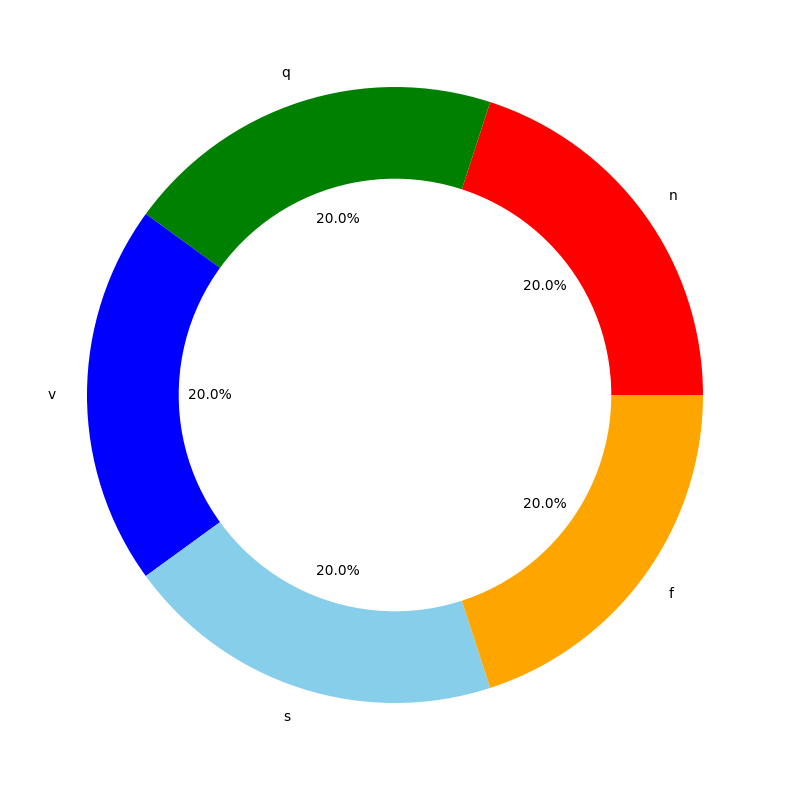

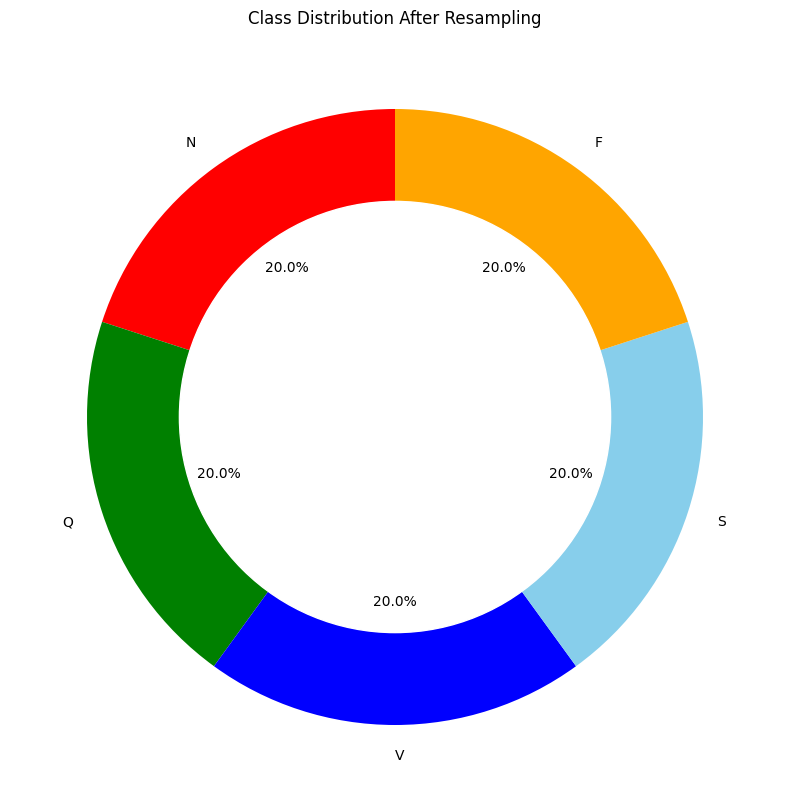

In [ ]:
plt.figure(figsize=(20, 10))
center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(
    class_distribution,
    labels=['n', 'q', 'v', 's', 'f'],
    colors=['red', 'green', 'blue', 'skyblue', 'orange'],
    autopct='%1.1f%%'
)
plt.gca().add_artist(center_circle)
plt.show()

# Create pie chart
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
plt.pie(class_distribution.values, labels=['N', 'Q', 'V', 'S', 'F'],
        colors=['red', 'green', 'blue', 'skyblue', 'orange'],
        autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution After Resampling')
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))  # Add white circle for donut effect
plt.show()

In [ ]:
c = train_df.groupby(187).sample(n=1, random_state=42)

In [ ]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
71521,0.826923,0.581731,0.307692,0.125000,0.000000,0.125000,0.230769,0.355769,0.394231,0.437500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
73046,0.456693,0.409449,0.295276,0.188976,0.141732,0.086614,0.051181,0.031496,0.011811,0.003937,...,0.082677,0.149606,0.122047,0.102362,0.090551,0.086614,0.086614,0.094488,0.090551,1
78353,0.000000,0.053412,0.083086,0.133531,0.219585,0.308605,0.367953,0.465875,0.569733,0.670623,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
80487,1.000000,0.895778,0.633245,0.275726,0.087071,0.116095,0.100264,0.076517,0.067282,0.060686,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
81194,0.807734,0.750806,0.687433,0.620838,0.531686,0.427497,0.312567,0.195489,0.118153,0.099893,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4


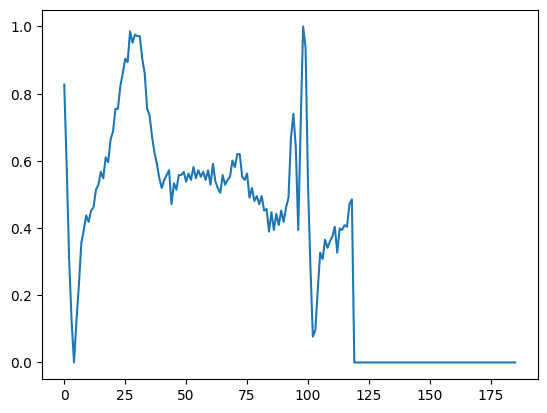

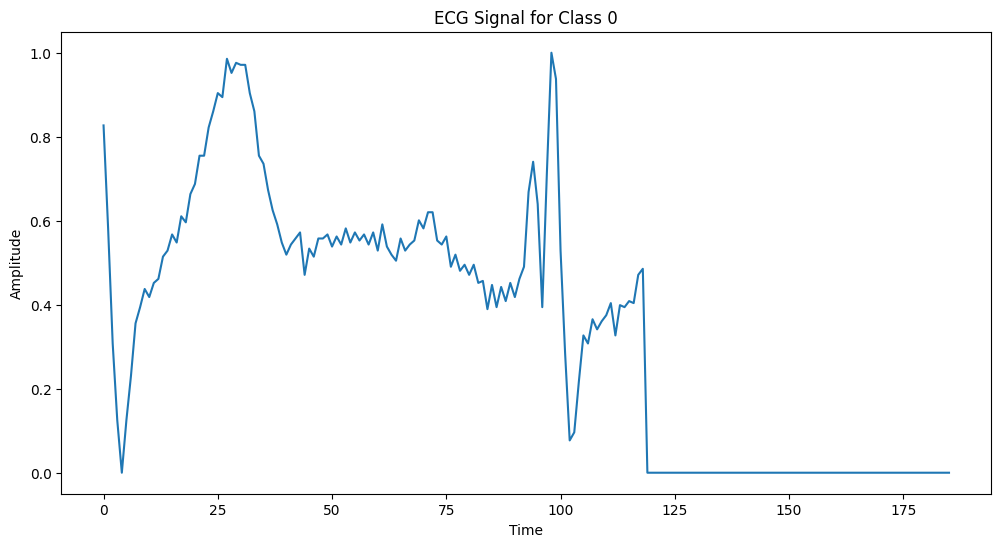

In [ ]:
plt.plot(c.iloc[0,:186])
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(c.iloc[0, :186].values) # Access values using .values
plt.title('ECG Signal for Class {}'.format(c.iloc[0, 187]))  # Set title with class label
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
def plot_hist(class_number, size, min_, bins):
    img = train_df.loc[train_df[187] == class_number].values
    img = img[:, min_:size]
    img_flattened = img.flatten()

    # Create a sequence of x-values for the entire dataset
    final_x = np.tile(np.arange(min_, size), img.shape[0])

    plt.hist2d(final_x, img_flattened, bins=(bins, bins), cmap=plt.cm.jet)
    plt.title(f'Class {class_number} - 2D Histogram')
    plt.xlabel('Signal Index')
    plt.ylabel('Amplitude')
    plt.colorbar(label='Frequency')
    plt.show()


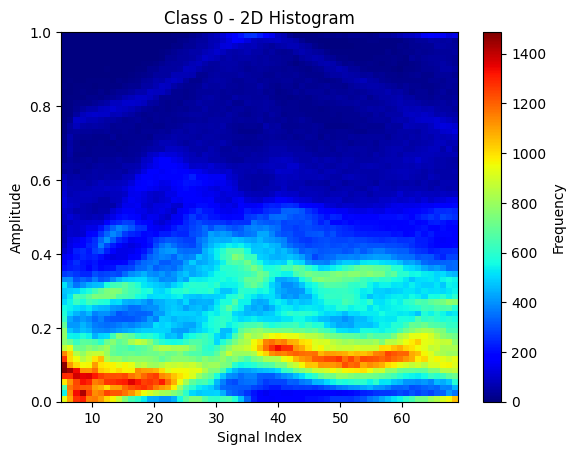

In [ ]:
plot_hist(0,70,5,65)

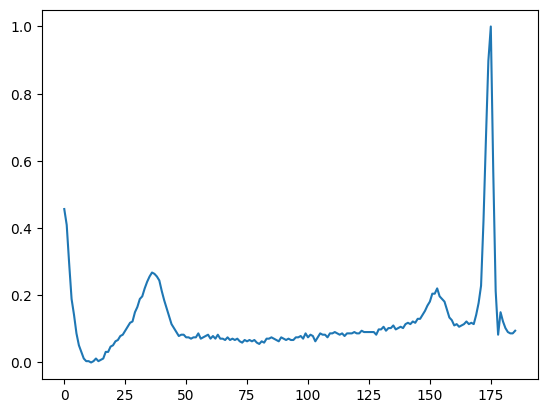

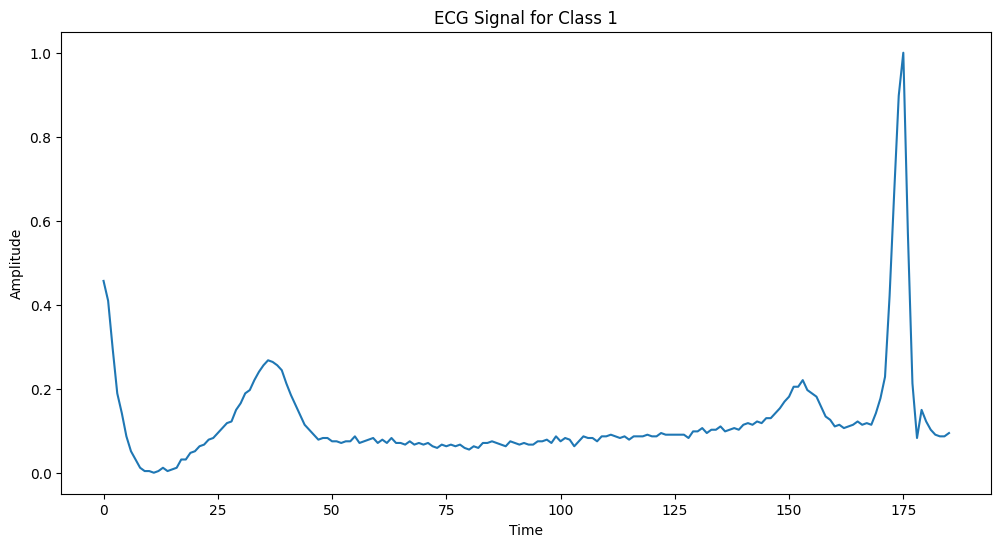

In [ ]:
plt.plot(c.iloc[1,:186])
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(c.iloc[1, :186].values)  # Access values using .values
plt.title('ECG Signal for Class {}'.format(c.iloc[1, 187]))  # Set title with class label
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

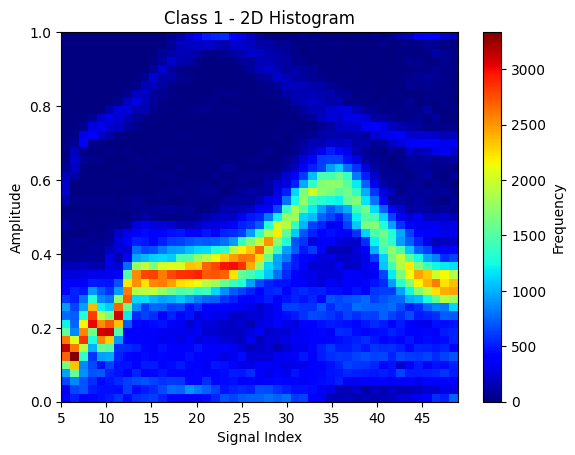

In [ ]:
plot_hist(1,50,5,45)

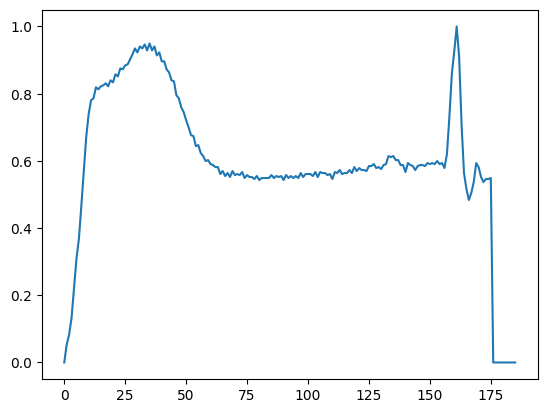

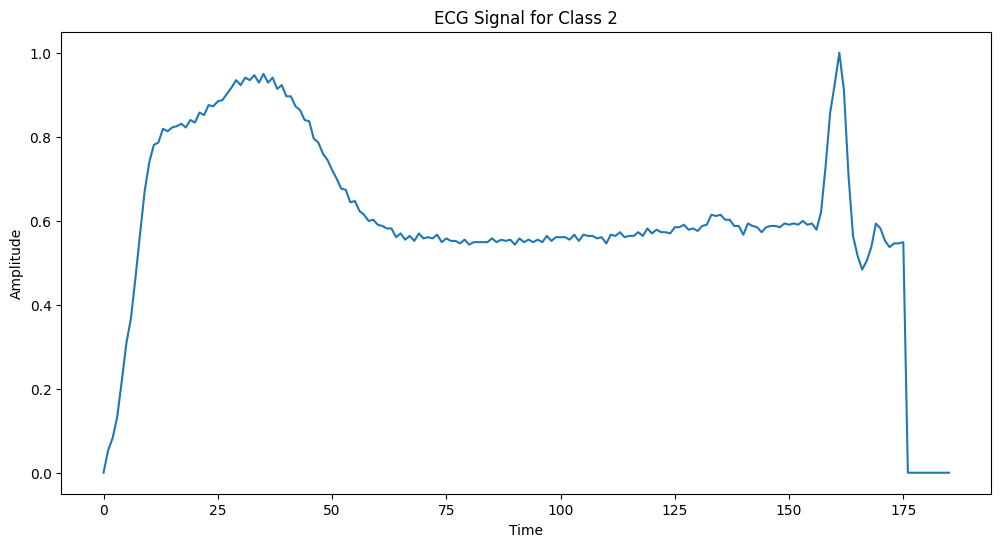

In [ ]:
plt.plot(c.iloc[2,:186])
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(c.iloc[2, :186].values)  # Access values using .values
plt.title('ECG Signal for Class {}'.format(c.iloc[2, 187]))  # Set title with class label
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

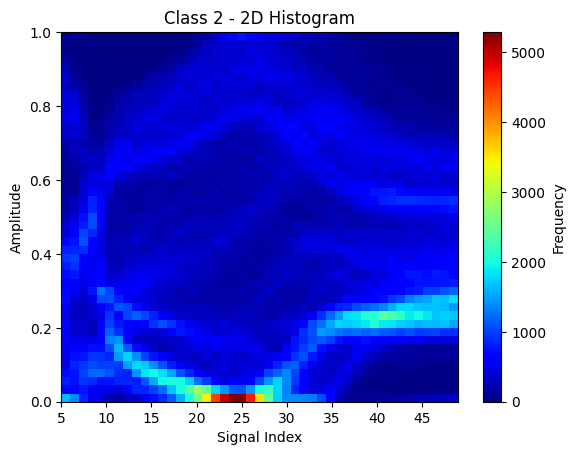

In [ ]:
plot_hist(2,50,5,45)

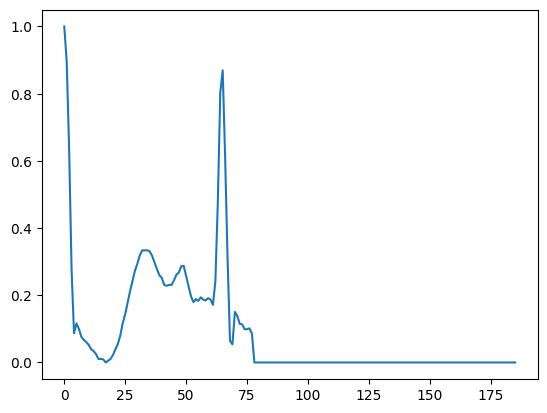

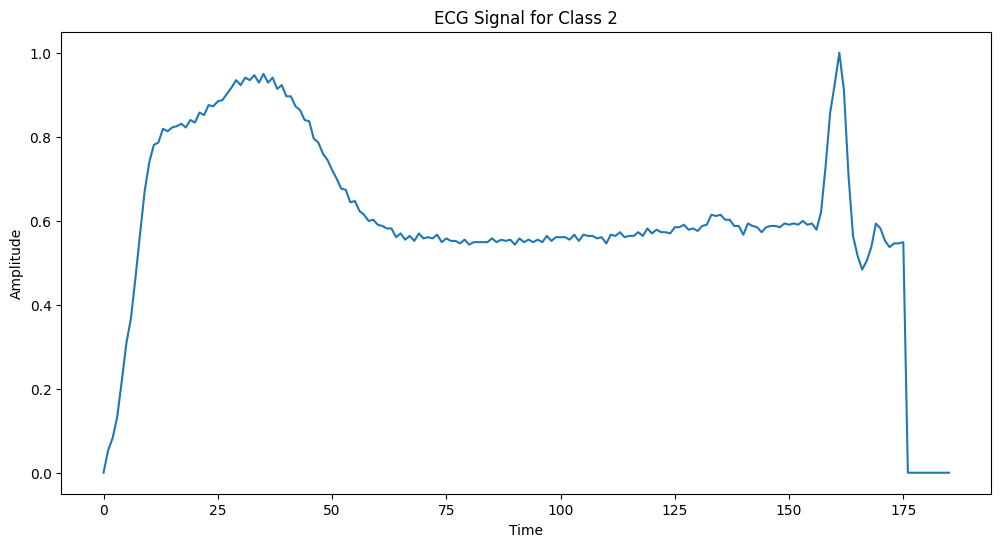

In [ ]:
plt.plot(c.iloc[3,:186])
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(c.iloc[2, :186].values)  # Access values using .values
plt.title('ECG Signal for Class {}'.format(c.iloc[2, 187]))  # Set title with class label
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

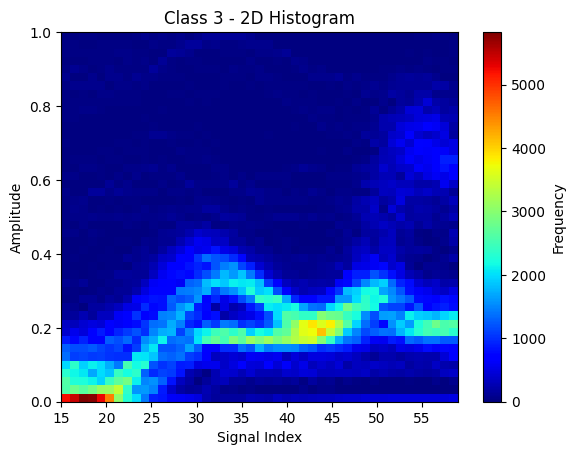

In [ ]:
plot_hist(3,60,15,45)

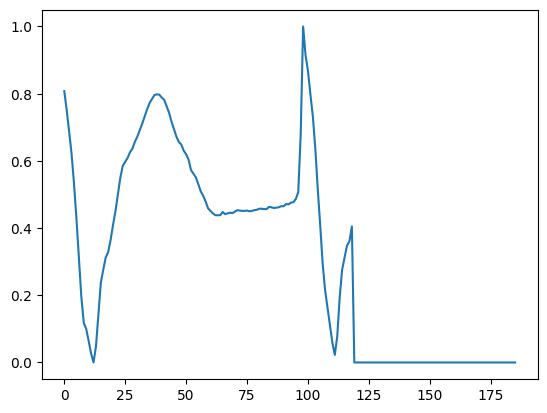

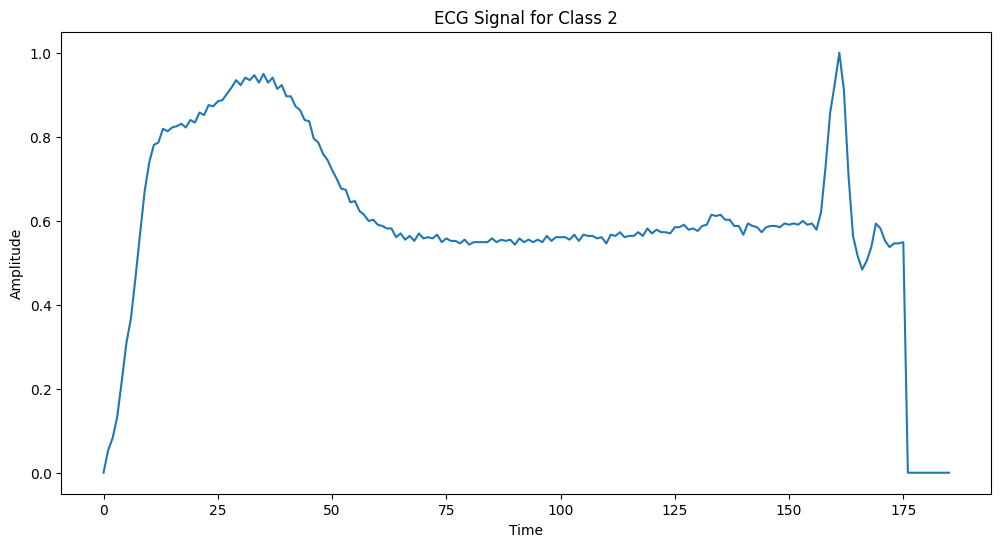

In [ ]:
plt.plot(c.iloc[4,:186])
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(c.iloc[2, :186].values)  # Access values using .values
plt.title('ECG Signal for Class {}'.format(c.iloc[2, 187]))  # Set title with class label
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

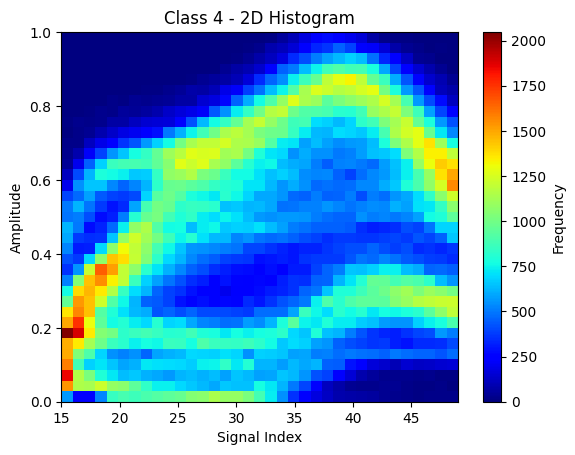

In [ ]:
plot_hist(4,50,15,35)

In [ ]:
def add_gaussian_noise(signal):
    noise = np.random.normal(loc=0, scale=0.05, size=len(signal))  # Adjust scale as needed
    return signal + noise

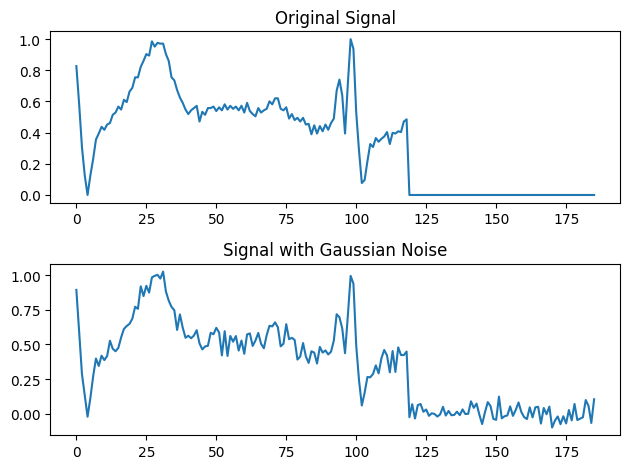

In [ ]:
tempo = c.iloc[0, :186]
noisy_data = add_gaussian_noise(tempo)
plt.subplot(2, 1, 1)
plt.plot(tempo)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(noisy_data)
plt.title('Signal with Gaussian Noise')

plt.tight_layout()
plt.show()

In [ ]:
target_train = train_df[187]
target_test = test_df[187]
y_train = to_categorical(target_train, num_classes=5)
y_test = to_categorical(target_test, num_classes=5)

In [ ]:
X_train = train_df.iloc[:, :186].values
X_test = test_df.iloc[:, :186].values
for i in range(len(X_train)):
    X_train[i, :186] = add_gaussian_noise(X_train[i, :186])
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def create_network(X_train, y_train, X_test, y_test):
    input_shape = (X_train.shape[1], 1)
    inputs = Input(shape=input_shape, name='inputs_cnn')

    conv1 = Conv1D(64, kernel_size=6, activation='relu')(inputs)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling1D(pool_size=3, strides=2, padding="same")(conv1)

    conv2 = Conv1D(64, kernel_size=3, activation='relu')(pool1)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling1D(pool_size=2, strides=2, padding="same")(conv2)

    conv3 = Conv1D(64, kernel_size=3, activation='relu')(pool2)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling1D(pool_size=2, strides=2, padding="same")(conv3)

    flatten = Flatten()(pool3)
    dense1 = Dense(64, activation='relu')(flatten)
    dense2 = Dense(32, activation='relu')(dense1)

    # Output layer with softmax activation for multi-class classification
    outputs = Dense(5, activation='softmax', name='main_output')(dense2)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
def evaluate_model(history, X_test, y_test, model):
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1] * 100))
    print(history)
    plt.figure()
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend(loc='lower right')
    plt.show()
    plt.figure()
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend(loc='upper right')
    plt.show()
    target_names = ['0', '1', '2', '3', '4']
    y_true = [np.argmax(element) for element in y_test]
    prediction_proba = model.predict(X_test)
    prediction = np.argmax(prediction_proba, axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.utils import class_weight
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import warnings
import keras

Epoch 1/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 119s 36ms/step - accuracy: 0.8671 - loss: 0.3626 - val_accuracy: 0.9085 - val_loss: 0.2636
Epoch 2/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 132s 33ms/step - accuracy: 0.9549 - loss: 0.1264 - val_accuracy: 0.9223 - val_loss: 0.2061
Epoch 3/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 143s 33ms/step - accuracy: 0.9675 - loss: 0.0891 - val_accuracy: 0.9369 - val_loss: 0.2094
Epoch 4/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 109s 35ms/step - accuracy: 0.9751 - loss: 0.0712 - val_accuracy: 0.9456 - val_loss: 0.1654
Epoch 5/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 148s 37ms/step - accuracy: 0.9809 - loss: 0.0548 - val_accuracy: 0.9560 - val_loss: 0.1589
Epoch 6/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 106s 34ms/step - accuracy: 0.9819 - loss: 0.0505 - val_accuracy: 0.9415 - val_loss: 0.2028
Epoch 7/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 106s 34ms/step - accuracy: 0.9837 - loss: 0.0457 - val_accuracy: 0.9508 - val_loss: 0.1837
Epoch 8/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 105s 33ms/step - accuracy: 

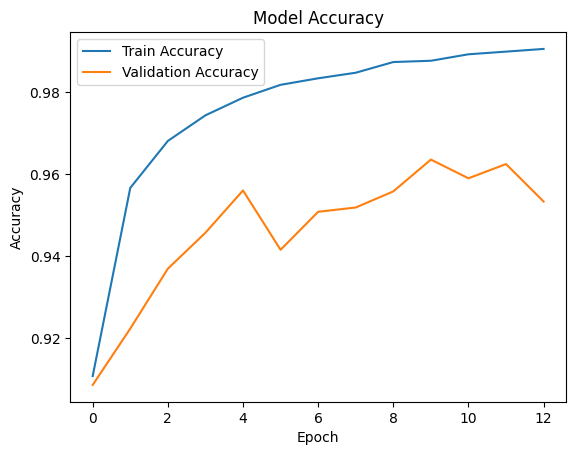

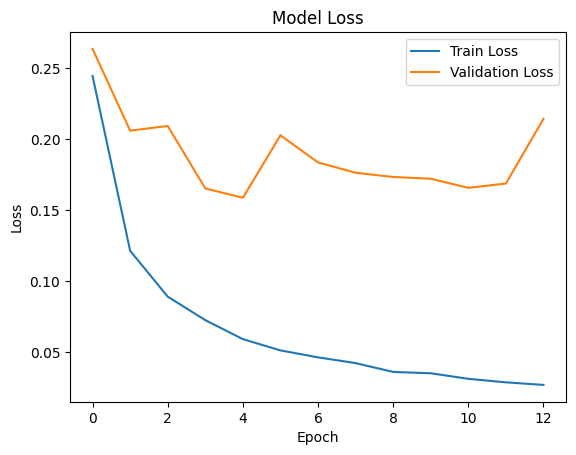

In [ ]:
warnings.filterwarnings('ignore')
def network(X_train, y_train, X_test, y_test):
    im_shape = (X_train.shape[1], 1)
    inputs_cnn = Input(shape=im_shape, name='inputs_cnn')
    conv1_1 = Convolution1D(64, kernel_size=6, activation='relu')(inputs_cnn)
    conv1_1 = BatchNormalization()(conv1_1)
    pool1 = MaxPool1D(pool_size=3, strides=2, padding="same")(conv1_1)
    conv2_1 = Convolution1D(64, kernel_size=3, activation='relu')(pool1)
    conv2_1 = BatchNormalization()(conv2_1)
    pool2 = MaxPool1D(pool_size=2, strides=2, padding="same")(conv2_1)
    conv3_1 = Convolution1D(64, kernel_size=3, activation='relu')(pool2)
    conv3_1 = BatchNormalization()(conv3_1)
    pool3 = MaxPool1D(pool_size=2, strides=2, padding="same")(conv3_1)
    flatten = Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)  # Adjust output classes
    model = Model(inputs=inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=8),
        ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)
    ]
    history = model.fit(X_train, y_train, epochs=50, callbacks=callbacks, batch_size=32, validation_data=(X_test, y_test))
    model.load_weights('best_model.keras')  # Load the best weights
    return model, history
model, history = network(X_train, y_train, X_test, y_test)
y_pred = model.predict(X_test)
def evaluate_model(history, X_test, y_test, model):
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))
    print("Confusion Matrix:\n", confusion_matrix(y_true_classes, y_pred_classes))
    print("F1 Score: ", f1_score(y_true_classes, y_pred_classes, average='weighted'))
evaluate_model(history, X_test, y_test, model)
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
plot_history(history)

In [ ]:
evaluate_model(history, X_test, y_test, model)
y_pred = model.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     18118
           1       0.53      0.83      0.65       556
           2       0.86      0.97      0.91      1448
           3       0.45      0.88      0.60       162
           4       0.98      0.98      0.98      1608

    accuracy                           0.96     21892
   macro avg       0.76      0.92      0.82     21892
weighted avg       0.97      0.96      0.96     21892

Confusion Matrix:
 [[17350   403   198   145    22]
 [   70   462    14     8     2]
 [   23     4  1399    19     3]
 [    5     1    14   142     0]
 [   16     5    11     1  1575]]
F1 Score:  0.9599862448715593
685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


Normalized confusion matrix


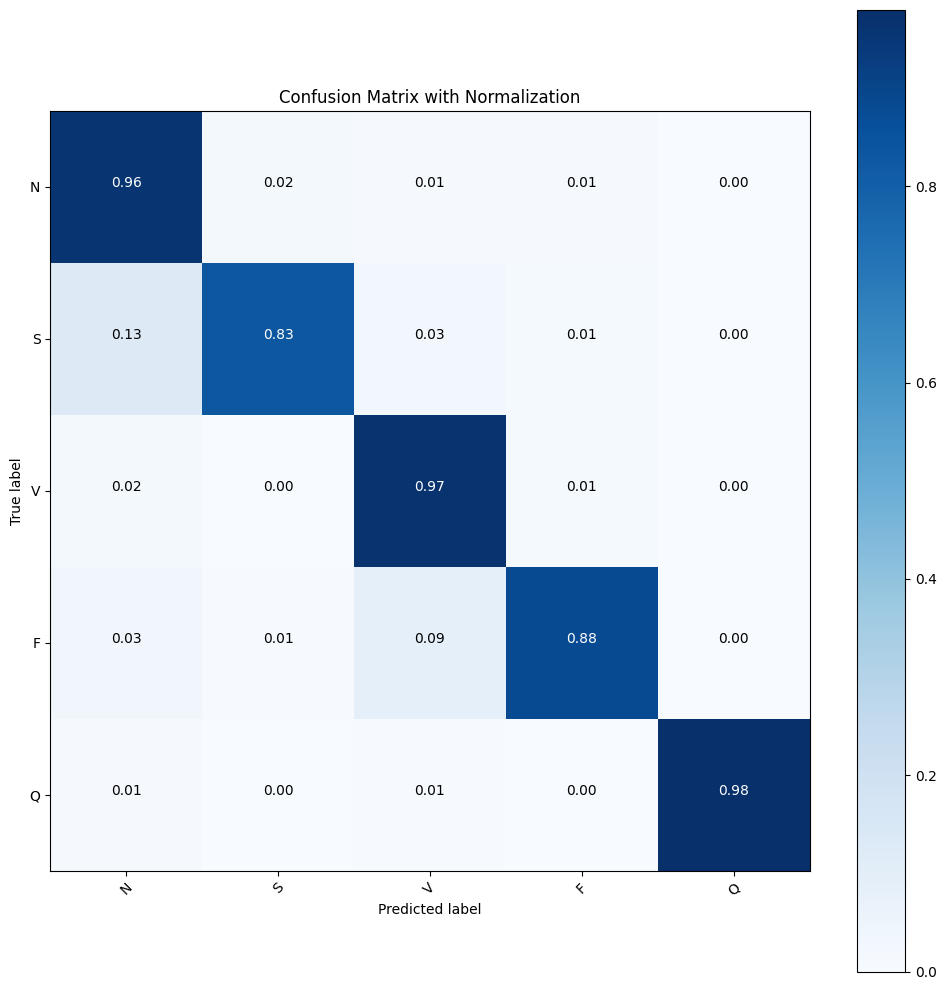

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'], normalize=True,
                      title='Confusion Matrix with Normalization')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint


def plot_confusion_matrix(y_true, y_pred):
    """Plot the confusion matrix."""
    cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()



In [ ]:
def lstm_network(X_train, y_train, X_test, y_test):
    """Build and train the LSTM model."""
    # Reshape the input data if necessary
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # First LSTM layer
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(32))  # Second LSTM layer
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(5, activation='softmax'))  # Output layer

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

    return model, history

In [ ]:
from keras.layers import Dense, Conv1D, MaxPooling1D, Dropout, LSTM, BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def hybrid_cnn_lstm_network(X_train, y_train, X_test, y_test):
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(LSTM(128, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ModelCheckpoint(filepath='best_cnn_lstm_model.keras', monitor='val_loss', save_best_only=True)
    ]
    history = model.fit(X_train, y_train, epochs=30, callbacks=callbacks, batch_size=32, validation_data=(X_test, y_test))
    model.load_weights('best_cnn_lstm_model.keras')
    return model, history
model, history = hybrid_cnn_lstm_network(X_train, y_train, X_test, y_test)
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 481s 152ms/step - accuracy: 0.6378 - loss: 0.9253 - val_accuracy: 0.8041 - val_loss: 0.5579
Epoch 2/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 491s 157ms/step - accuracy: 0.8733 - loss: 0.3622 - val_accuracy: 0.9323 - val_loss: 0.2139
Epoch 3/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 481s 154ms/step - accuracy: 0.9031 - loss: 0.2739 - val_accuracy: 0.8702 - val_loss: 0.3470
Epoch 4/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 454s 145ms/step - accuracy: 0.9200 - loss: 0.2308 - val_accuracy: 0.9073 - val_loss: 0.2473
Epoch 5/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 456s 146ms/step - accuracy: 0.9286 - loss: 0.2043 - val_accuracy: 0.8653 - val_loss: 0.3411
Epoch 6/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 472s 151ms/step - accuracy: 0.9352 - loss: 0.1864 - val_accuracy: 0.9251 - val_loss: 0.2129
Epoch 7/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 494s 148ms/step - accuracy: 0.9402 - loss: 0.1742 - val_accuracy: 0.9143 - val_loss: 0.2230
Epoch 8/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 466s 149ms/step - ac

In [ ]:
def hybrid_cnn_lstm_network(X_train, y_train, X_test, y_test):
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(LSTM(64, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(LSTM(32))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint(filepath='best_cnn_lstm_model.keras', monitor='val_loss', save_best_only=True)
    ]
    history = model.fit(X_train, y_train, epochs=30, callbacks=callbacks, batch_size=64, validation_data=(X_test, y_test))
    model.load_weights('best_cnn_lstm_model.keras')
    return model, history